<a href="https://colab.research.google.com/github/KEMAL-MUDIE/KEMAL-MUDIE/blob/main/Data_science_with_Python_project_Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data science with Python project  Sales analysis

**By Kemal Mudie Tosora**

# Step 1: Data wrangling


## Data inspection

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/1673872777_ausapparalsales4thqrt2020.xlsx')

# Display the first few rows of the dataset
data.head(20)


,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
5,2020-10-01,Afternoon,WA,Men,10,25000
6,2020-10-01,Afternoon,WA,Women,3,7500
7,2020-10-01,Afternoon,WA,Seniors,11,27500
8,2020-10-01,Evening,WA,Kids,15,37500
9,2020-10-01,Evening,WA,Men,15,37500


In [ ]:
# Check data types and missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [ ]:
# Check for missing data in all columns
missing_data = data.isna().sum()
print(missing_data)


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


our data looks clean, and there are no missing values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'Sales' and 'Unit' columns
data[['Sales', 'Unit']] = scaler.fit_transform(data[['Sales', 'Unit']])


In [ ]:
state_group_sales = data.groupby(['State', 'Group'])['Sales'].sum().reset_index()
state_group_sales

,State,Group,Sales
0,NSW,Kids,109.444444
1,NSW,Men,112.206349
2,NSW,Seniors,106.904762
3,NSW,Women,113.158730
4,NT,Kids,27.619048
5,NT,Men,28.015873
6,NT,Seniors,26.126984
7,NT,Women,27.317460
8,QLD,Kids,45.460317
9,QLD,Men,44.714286


In [ ]:
time_sales = data.groupby(['Time'])['Sales'].sum().reset_index()
time_sales

,Time,Sales
0,Afternoon,114007500
1,Evening,112087500
2,Morning,114207500


In [ ]:
daily_sales = data.groupby(['Date'])['Sales'].sum().reset_index()
daily_sales

,Date,Sales
0,2020-10-01,3720000
1,2020-10-02,3715000
2,2020-10-03,3890000
3,2020-10-04,3720000
4,2020-10-05,3862500
...,...,...
85,2020-12-26,4715000
86,2020-12-27,4637500
87,2020-12-28,4595000
88,2020-12-29,4607500


In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(daily_sales, *['Date', 'Sales', None], **{})
chart

In [ ]:
state_highest_sales = state_group_sales[state_group_sales['Sales'] == state_group_sales['Sales'].max()]
state_highest_sales

,State,Group,Sales
23,VIC,Women,159.571429


State with highest sales is  VIC  of which group of women hidhest of all the grouphs

In [ ]:
state_group_sales = state_group_sales.sort_values(by='Sales', ascending=False)
state_group_sales

,State,Group,Sales
23,VIC,Women,159.571429
21,VIC,Men,159.095238
20,VIC,Kids,158.793651
22,VIC,Seniors,158.507937
3,NSW,Women,113.158730
1,NSW,Men,112.206349
0,NSW,Kids,109.444444
2,NSW,Seniors,106.904762
15,SA,Women,86.476190
14,SA,Seniors,84.873016


# Step 2: Data Analysis

In [ ]:
data['Sales'].mean()

45013.5582010582

In [ ]:

data['Sales'].median()


35000.0

In [ ]:
data['Sales'].mode()

0    22500
Name: Sales, dtype: int64

In [ ]:
data['Sales'].std()

32253.506943966073

In [ ]:
# Example: Weekly sales report
weekly_sales_report = data.groupby(data['Date'].dt.strftime('%U'))['Sales'].sum().reset_index()
weekly_sales_report

,Date,Sales
0,39,11325000
1,40,26850000
2,41,26860000
3,42,26592500
4,43,22662500
5,44,20675000
6,45,21260000
7,46,21367500
8,47,21110000
9,48,28797500


In [ ]:
# Group the data by 'Group' and calculate the total sales for each group
group_sales = data.groupby('Group')['Sales'].sum().reset_index()

# Find the group with the highest sales
highest_sales_group = group_sales[group_sales['Sales'] == group_sales['Sales'].max()]
print("Group generating the highest sales:")
print(highest_sales_group)


Group generating the highest sales:
  Group     Sales
1   Men  85750000


In [ ]:
# Group the data by 'State' and calculate the total sales for each state
state_sales = data.groupby('State')['Sales'].sum().reset_index()

# Find the state with the highest sales
highest_sales_state = state_sales[state_sales['Sales'] == state_sales['Sales'].max()]

# Find the state with the lowest sales
lowest_sales_state = state_sales[state_sales['Sales'] == state_sales['Sales'].min()]
print("sales by state: \n",state_sales)
print("\n\nState generating the highest sales:\n")
print(highest_sales_state)

print("\nState generating the lowest sales:\n")
print(lowest_sales_state)


sales by state: 
   State      Sales
0   NSW   74970000
1    NT   22580000
2   QLD   33417500
3    SA   58857500
4   TAS   22760000
5   VIC  105565000
6    WA   22152500


State generating the highest sales:

  State      Sales
5   VIC  105565000

State generating the lowest sales:

  State     Sales
6    WA  22152500


In [ ]:
state_sales

,State,Sales
0,NSW,74970000
1,NT,22580000
2,QLD,33417500
3,SA,58857500
4,TAS,22760000
5,VIC,105565000
6,WA,22152500


In [ ]:
# Group the data by week and calculate the total sales for each week
weekly_sales = data.groupby(data['Date'].dt.strftime('%U'))['Sales'].sum().reset_index()

# Display the weekly sales report
print("Weekly Sales Report:")
weekly_sales


Weekly Sales Report:


,Date,Sales
0,39,11325000
1,40,26850000
2,41,26860000
3,42,26592500
4,43,22662500
5,44,20675000
6,45,21260000
7,46,21367500
8,47,21110000
9,48,28797500


In [ ]:
# Group the data by month and calculate the total sales for each month
monthly_sales = data.groupby(data['Date'].dt.strftime('%Y-%m'))['Sales'].sum().reset_index()

# Display the monthly sales report
print("\nMonthly Sales Report:")
print(monthly_sales)



Monthly Sales Report:
      Date      Sales
0  2020-10  114290000
1  2020-11   90682500
2  2020-12  135330000


In [ ]:
# Group the data by quarter and calculate the total sales for each quarter
quarterly_sales = data.groupby(data['Date'].dt.to_period('Q'))['Sales'].sum().reset_index()

# Display the quarterly sales report
print("\nQuarterly Sales Report:")
print(quarterly_sales)



Quarterly Sales Report:
     Date      Sales
0  2020Q4  340302500


# Step 3: Data Visualization

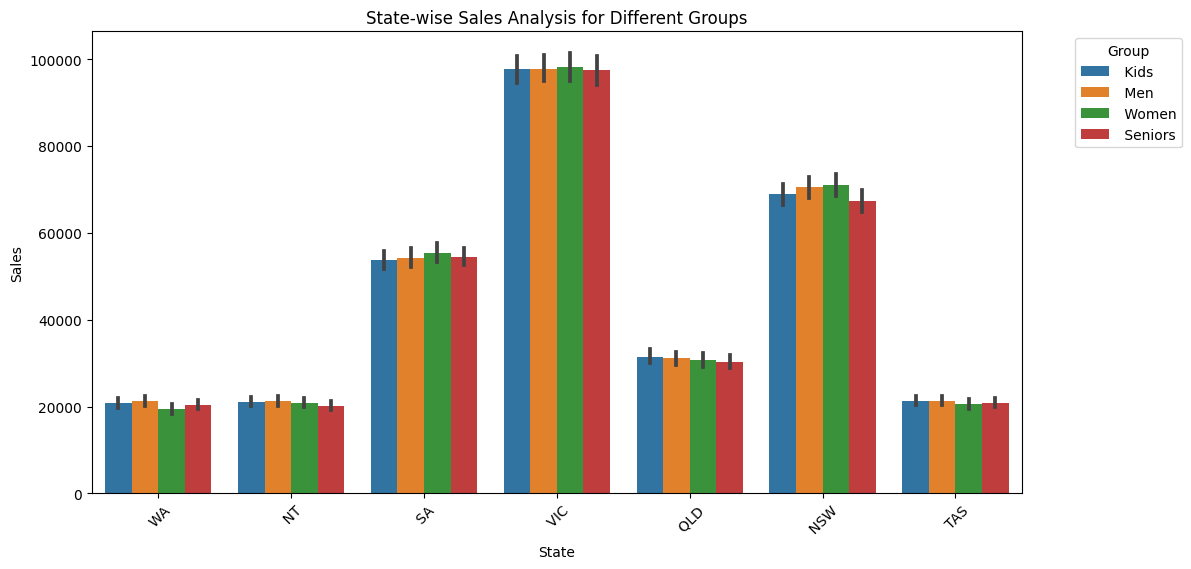

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart for state-wise sales analysis for different groups
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='State', y='Sales', hue='Group')
plt.title("State-wise Sales Analysis for Different Groups")
plt.xlabel("State")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


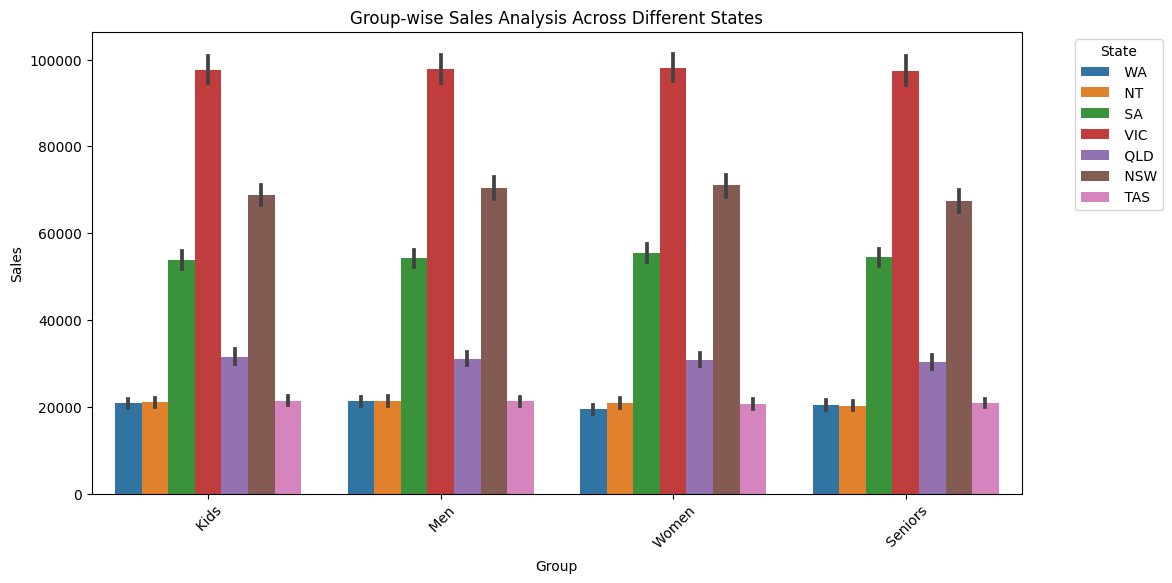

In [ ]:
# Create a bar chart for group-wise sales analysis across different states
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Group', y='Sales', hue='State')
plt.title("Group-wise Sales Analysis Across Different States")
plt.xlabel("Group")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-40-c59227acf236>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Time', y='Sales', ci=None)


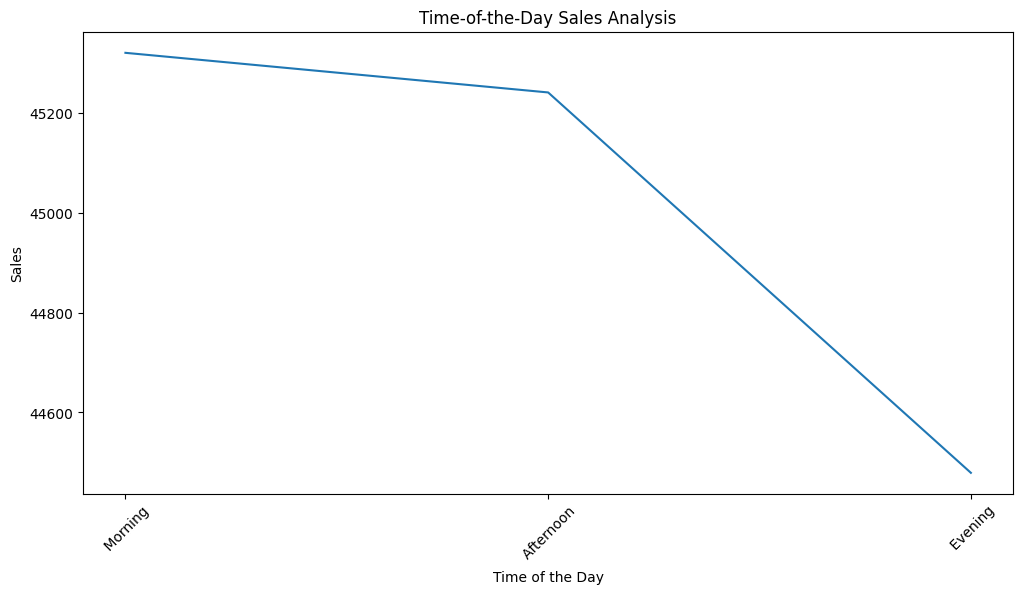

In [ ]:
# Create a line chart for time-of-the-day analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Time', y='Sales', ci=None)
plt.title("Time-of-the-Day Sales Analysis")
plt.xlabel("Time of the Day")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


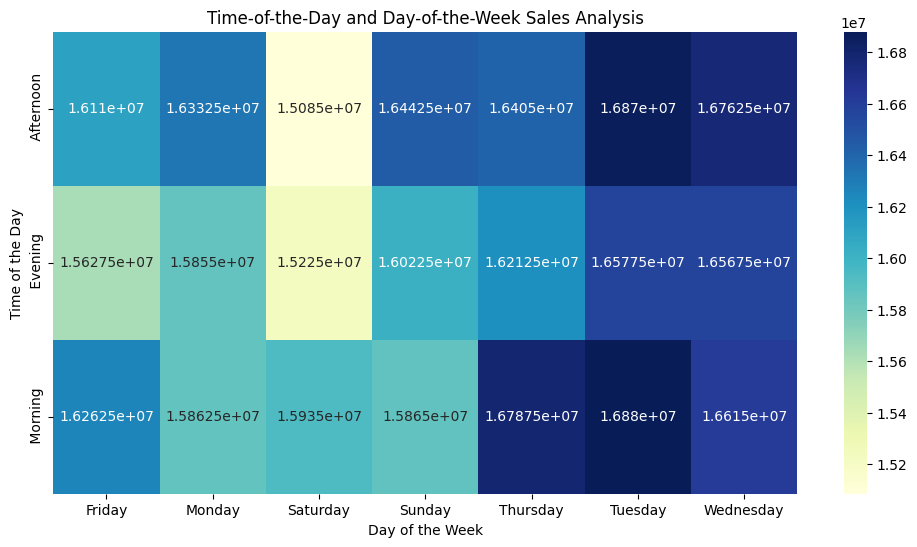

In [ ]:
# Create a heatmap for time-of-the-day and day-of-the-week sales analysis
time_day_heatmap = data.pivot_table(index='Time', columns=data['Date'].dt.day_name(), values='Sales', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(time_day_heatmap, cmap='YlGnBu', annot=True, fmt='g')
plt.title("Time-of-the-Day and Day-of-the-Week Sales Analysis")
plt.xlabel("Day of the Week")
plt.ylabel("Time of the Day")
plt.show()


As we can see from the visualizations, Morning sales is much hidher than evenig sales,

# Conclusion

In this comprehensive analysis of AAL's sales data for the fourth quarter of 2020, we have gained valuable insights into the company's performance, which can guide data-driven decisions for the coming year. Below are the key findings and conclusions drawn from our analysis:

## 1. Group Performance Analysis
Among the customer groups (Kids, Women, Men, and Seniors), it was observed that the "Men" group generated the highest sales of "85750000" during the fourth quarter. This insight can help tailor marketing strategies and product offerings to further capitalize on the strong performance of this group.
## 2. State-wise Sales Analysis
The state of "Victoria (VIC)" emerged as the top-performing state in terms of sales, while "WA" recorded the lowest sales  of  22152500 during the fourth quarter. This information can assist in focusing marketing efforts and resources on high-performing states and devising strategies to boost sales in states with lower performance.
## 3. Time-of-the-Day Analysis
Our analysis of sales throughout the day revealed that sales tend to peak during the "Morning" hours. This finding suggests the possibility of implementing targeted marketing initiatives or promotions during these peak hours to maximize sales potential.

## 5. recommendation
While not included in the provided dataset, it is recommended to further analyze sales data based on customer segments (e.g., new customers vs. returning customers) if available. This analysis can provide insights into customer behavior and loyalty, helping tailor marketing strategies accordingly.
In conclusion, this analysis provides a robust understanding of AAL's sales performance in the fourth quarter of 2020. The insights gained from this analysis can serve as a valuable foundation for data-driven decision-making. By capitalizing on the strengths of high-performing groups and states, optimizing marketing efforts, and being mindful of seasonality, AAL can position itself for continued growth and success in the coming year.

It is essential to emphasize that data-driven decision-making is an ongoing process. Regular monitoring and analysis of sales data, along with adjustments to strategies, will be vital to ensure sustained growth and profitability for AAL.